In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import webbpsf
webbpsf.setup_logging()

WebbPSF log messages of level INFO and above will be shown.
WebbPSF log outputs will be directed to the screen.


In [3]:
from webbopds import OPD, OPDbender

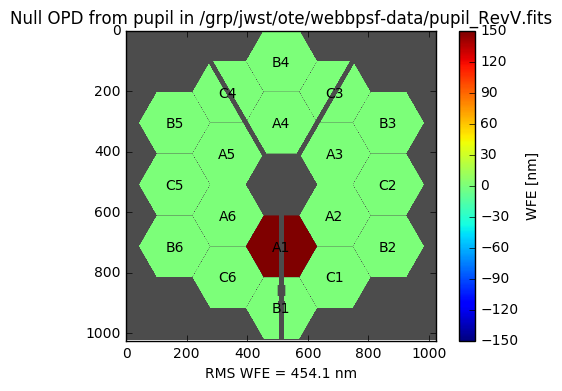

In [4]:
# This displaces the A1 segment in the *plus* Z direction (as I think of it),
# introducing a positive optical path length difference of 1 micron.
# (The `unit` kwarg can specify others.)

tel = OPDbender(pupilfile="/grp/jwst/ote/webbpsf-data/pupil_RevV.fits")
tel.displace('A1', 0.0, 0.0, -1.0, draw=True)

## Make some OPDs with piston terms added

The effects should wrap at integer multiples of the center wavelength of the filter we're using. So, if we perturb in piston from $-\lambda$ to $+\lambda$, we'll get an idea of the worst case performance without needing to know absolute piston tolerances for segments entering coarse phasing.

In [5]:
fgs = webbpsf.FGS()

In [6]:
# pistons_212 = 2 * 2.12 * np.random.rand(18) - 2.12  # center at 0
pistons_212 = np.array([-0.39225044, -1.27826115, -0.77738275,  1.73183878, -1.92438441,
                      0.19741484,  0.26523904,  0.38450224,  1.66699429,  0.22936222,
                     -2.02537907,  1.60799584,  0.69247481,  1.68902489, -1.52981625,
                      0.16965032,  0.87993073, -0.77316309])

print(repr(pistons_212))

array([-0.39225044, -1.27826115, -0.77738275,  1.73183878, -1.92438441,
        0.19741484,  0.26523904,  0.38450224,  1.66699429,  0.22936222,
       -2.02537907,  1.60799584,  0.69247481,  1.68902489, -1.52981625,
        0.16965032,  0.87993073, -0.77316309])


In [7]:
fgs.opd_list

['OPD_RevV_fgs_150.fits', 'OPD_RevV_fgs_163.fits', 'OPD_RevV_fgs_186.fits']

In [8]:
tel = OPDbender(
    opdfile='/grp/jwst/ote/webbpsf-data/FGS/OPD/OPD_RevV_fgs_150.fits',
    pupilfile="/grp/jwst/ote/webbpsf-data/pupil_RevV.fits"
)

for segname, piston in zip(tel.segnames, pistons_212):
    tel.displace(segname, 0, 0, piston)

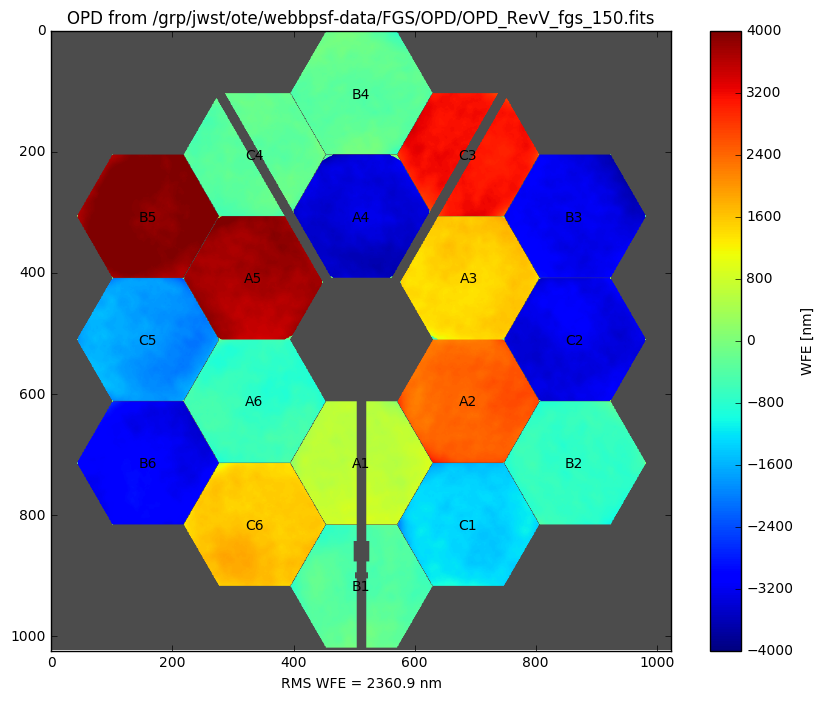

In [9]:
plt.figure(figsize=(10, 8))
tel.draw(labelsegs=True, clear=False, vmax=4000)

In [10]:
output = tel.asFITS()
output.info()

[astropy] AstropyDeprecationWarning: The use of header.update() to add new keywords to a header is deprecated.  Instead, use either header.set() or simply `header[keyword] = value` or `header[keyword] = (value, comment)`.  header.set() is only necessary to use if you also want to use the before/after keyword arguments.


Filename: (No file associated with this HDUList)
No.    Name         Type      Cards   Dimensions   Format
0    OPD         PrimaryHDU      37   (1024, 1024)   float32   
1    PUPIL       ImageHDU        16   (1024, 1024)   float32   


In [11]:
output['OPD'].writeto('./example_FGS_opd_plus-minus_one_wave_at_2.12um.fits', clobber=True)

In [12]:
fgs

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: no WAVEUNIT keyword found in filter file /Users/jlong/anaconda/envs/webbpsf-demo/share/webbpsf-data/FGS/filters/FGS_throughput.fits. Assuming = Angstroms by default
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 10 steps


[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 10
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+FGS
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/jlong/anaconda/envs/webbpsf-demo/share/webbpsf-data/pupil_RevV.fits
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added detector with pixelscale=0.0691 and oversampling=4: FGS detector
[  poppy] Calculating PSF with 10 wavelengths
[  poppy]  Propagating wavelength = 9.24211e-07 m
[  poppy]  Propagating wavelength = 1.34105e-06 m
[  poppy]  Propagating wavelength = 1.75789e-06 m
[  poppy]  Propagating wavelength = 2.17474e-06 m
[  poppy]  Propagating wavelength = 2.59158e-06 m
[  poppy]  Propagating wavelength = 3.00842e-06 m
[  poppy]  Propagating wavelength = 3.42526e-06 m
[  poppy]  Propagating wavelength = 3.84211e-06 m
[  poppy]  Propagating wavelength = 4.25895e-0

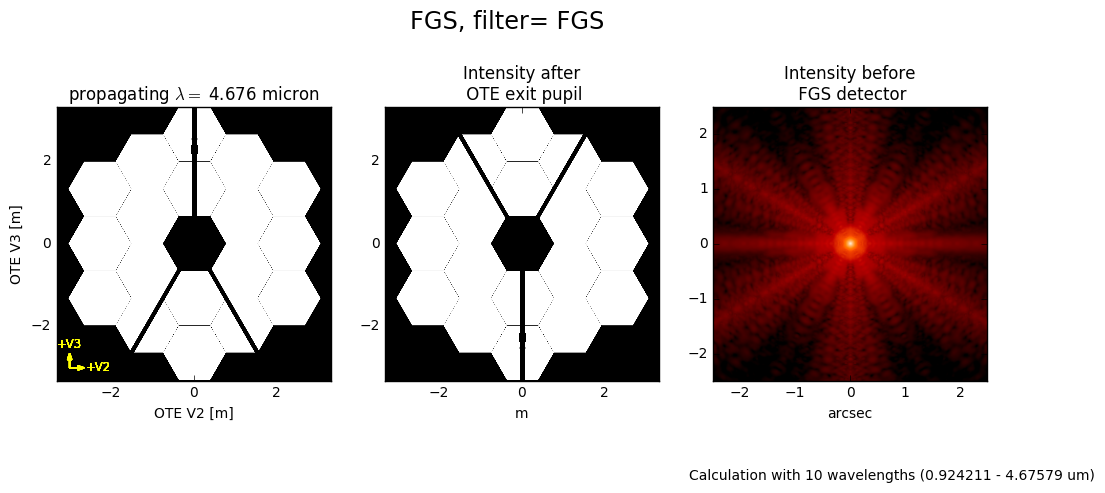

In [13]:
plt.figure(figsize=(12,5))
fgs.pupilopd = None
fgs.calc_psf(display=True)

In [ ]:
fgs.pupilopd = './example_FGS_opd_plus-minus_one_wave_at_2.12um.fits'

In [ ]:
plt.figure(figsize=(12,5))
psf = fgs.calc_psf(display=True)

[  poppy] Pysynphot unavailable (or invalid source supplied)!   Assuming flat # of counts versus wavelength.
[  poppy] CAUTION: no WAVEUNIT keyword found in filter file /Users/jlong/anaconda/envs/webbpsf-demo/share/webbpsf-data/FGS/filters/FGS_throughput.fits. Assuming = Angstroms by default
[  poppy] CAUTION: Just interpolating rather than integrating filter profile, over 10 steps


[  poppy] PSF calc using fov_arcsec = 5.000000, oversample = 4, number of wavelengths = 10
[webbpsf] Creating optical system model:
[  poppy] Initialized OpticalSystem: JWST+FGS
[  poppy] JWST Entrance Pupil: Loaded amplitude transmission from /Users/jlong/anaconda/envs/webbpsf-demo/share/webbpsf-data/pupil_RevV.fits
[  poppy] JWST Entrance Pupil: Loaded OPD from ./example_FGS_opd_plus-minus_one_wave_at_2.12um.fits
[  poppy] Added pupil plane: JWST Entrance Pupil
[  poppy] Added coordinate inversion plane: OTE exit pupil
[  poppy] Added detector with pixelscale=0.0691 and oversampling=4: FGS detector
[  poppy] Calculating PSF with 10 wavelengths
[  poppy]  Propagating wavelength = 9.24211e-07 m
[  poppy]  Propagating wavelength = 1.34105e-06 m
[  poppy]  Propagating wavelength = 1.75789e-06 m
[  poppy]  Propagating wavelength = 2.17474e-06 m
[  poppy]  Propagating wavelength = 2.59158e-06 m
[  poppy]  Propagating wavelength = 3.00842e-06 m
[  poppy]  Propagating wavelength = 3.42526e-0